In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

content ID, category, content type, reaction type, and reaction score.

In [ ]:
content = pd.read_csv("Content.csv")

In [ ]:
content

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
...,...,...,...,...,...,...
995,995,b4cef9ef-627b-41d7-a051-5961b0204ebb,5b62e10e-3c19-4d28-a57c-e9bdc3d6758d,video,public speaking,NaN
996,996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,4fe420fa-a193-4408-bd5d-62a020233609,GIF,technology,https://socialbuzz.cdn.com/content/storage/7a7...
997,997,435007a5-6261-4d8b-b0a4-55fdc189754b,35d6a1f3-e358-4d4b-8074-05f3b7f35c2a,audio,veganism,https://socialbuzz.cdn.com/content/storage/435...
998,998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,b9bcd994-f000-4f6b-87fc-caae08acfaa1,GIF,culture,https://socialbuzz.cdn.com/content/storage/4e4...


In [ ]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [ ]:
content.dropna(inplace=True)

In [ ]:
content.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  801 non-null    int64 
 1   Content ID  801 non-null    object
 2   User ID     801 non-null    object
 3   Type        801 non-null    object
 4   Category    801 non-null    object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 43.8+ KB


In [ ]:
content.dtypes

Unnamed: 0     int64
Content ID    object
User ID       object
Type          object
Category      object
URL           object
dtype: object

In [ ]:
content["Category"].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'dogs',
       'soccer', 'public speaking', 'tennis', 'travel', 'education',
       'studying', 'science', 'veganism', 'cooking', 'animals', 'fitness',
       'culture'], dtype=object)

In [ ]:
content["Category"].replace({"Studying" : "studying"}, inplace = True)

In [ ]:
content["Category"].nunique()

16

In [ ]:
content.drop(['User ID', 'URL'], axis=1, inplace =True)

In [ ]:
content.columns

Index(['Unnamed: 0', 'Content ID', 'Type', 'Category'], dtype='object')

ReactionT

In [ ]:
reactionT = pd.read_csv("ReactionTypes.csv")

In [ ]:
reactionT.count()

Unnamed: 0    16
Type          16
Sentiment     16
Score         16
dtype: int64

In [ ]:
reactionT.dtypes

Unnamed: 0     int64
Type          object
Sentiment     object
Score          int64
dtype: object

Reactions

In [ ]:
reactions = pd.read_csv("Reactions.csv")

In [ ]:
reactions.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [ ]:
reactions.shape

(25553, 5)

In [ ]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


In [ ]:
reactions.isnull().count()

Unnamed: 0    25553
Content ID    25553
User ID       25553
Type          25553
Datetime      25553
dtype: int64

In [ ]:
reactions.drop(['User ID'], axis=1, inplace=True)

In [ ]:
reactions.columns

Index(['Unnamed: 0', 'Content ID', 'Type', 'Datetime'], dtype='object')

In [ ]:
reactions.dropna(inplace=True)

In [ ]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 1 to 25552
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  24573 non-null  int64 
 1   Content ID  24573 non-null  object
 2   Type        24573 non-null  object
 3   Datetime    24573 non-null  object
dtypes: int64(1), object(3)
memory usage: 959.9+ KB


In [ ]:
reactions.tail()

,Unnamed: 0,Content ID,Type,Datetime
25548,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48
25549,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02
25550,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58
25551,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31
25552,25552,75d6b589-7fae-4a6d-b0d0-752845150e56,cherish,2021-01-04 04:55:11


In [ ]:
reactions.dtypes

Unnamed: 0     int64
Content ID    object
Type          object
Datetime      object
dtype: object

In [ ]:
reactions["Datetime"] = pd.to_datetime(reactions["Datetime"])

In [ ]:
reactions.dtypes

Unnamed: 0             int64
Content ID            object
Type                  object
Datetime      datetime64[ns]
dtype: object

Merging all three datasets

In [ ]:
print("content",content.columns)
print("reactions",reactions.columns)
print("reactionT",reactionT.columns)

content Index(['Unnamed: 0', 'Content ID', 'Type', 'Category'], dtype='object')
reactions Index(['Unnamed: 0', 'Content ID', 'Type', 'Datetime'], dtype='object')
reactionT Index(['Unnamed: 0', 'Type', 'Sentiment', 'Score'], dtype='object')


In [ ]:
outer_merged = pd.merge(reactions, content, how="right", on ="Type")

In [ ]:
outer_merged.head()

,Unnamed: 0_x,Content ID_x,Type,Datetime,Unnamed: 0_y,Content ID_y,Category
0,NaN,NaN,photo,NaT,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,studying
1,NaN,NaN,photo,NaT,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,healthy eating
2,NaN,NaN,photo,NaT,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,healthy eating
3,NaN,NaN,photo,NaT,3,356fff80-da4d-4785-9f43-bc1261031dc6,technology
4,NaN,NaN,video,NaT,4,01ab84dd-6364-4236-abbb-3f237db77180,food


FINAL VISUALISATION


In [83]:
final = pd.read_csv("/content/Task 3_Final Content Data set.csv")

In [84]:
final.head()

,Unnamed: 0,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,7/11/20 9:43,photo,studying,negative,0
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/6/21 12:22,photo,studying,negative,10
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/4/21 5:13,photo,studying,negative,15
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,6/1/21 19:13,photo,studying,negative,0
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/8/20 12:25,photo,studying,positive,30


In [85]:
df = final.groupby("Category")["Score"].sum()

In [90]:
df1 = df.sort_values(ascending=False).head(5)

In [91]:
df1

Category
animals           74965
science           71168
healthy eating    69339
technology        68738
food              66676
Name: Score, dtype: int64

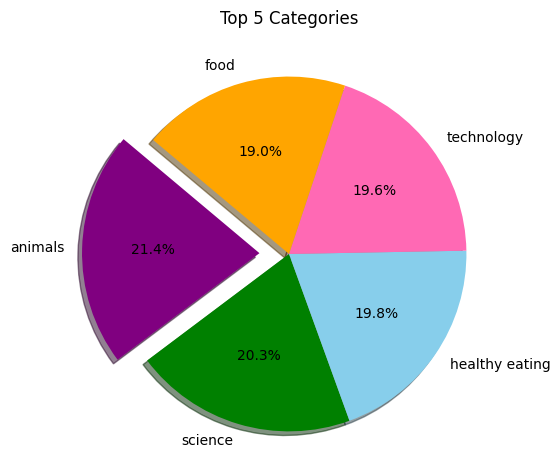

In [112]:
plt.pie(df1, autopct = '%.1f%%', radius=1.2, labels= df1.index, colors=["Purple", "Green", "skyblue","hotpink", "Orange"], explode=[0.2,0,0,0,0], shadow=True, startangle=140)
plt.title('Top 5 Categories', y=1.1)
plt.show()

How many unique categories are there?

In [14]:
colors = {u'c': (0.0, 0.75, 0.75), u'b': (0.0, 0.0, 1.0), u'r': (1.0, 1.0, 1.0), u'g': (0.0, 0.5, 0.0), u'y': (0.75, 0.75, 0), u'c': (0.0, 0.0, 0.0), u'r': (1.0, 0.0, 0.0), u'm': (0.75, 0, 0.75)}

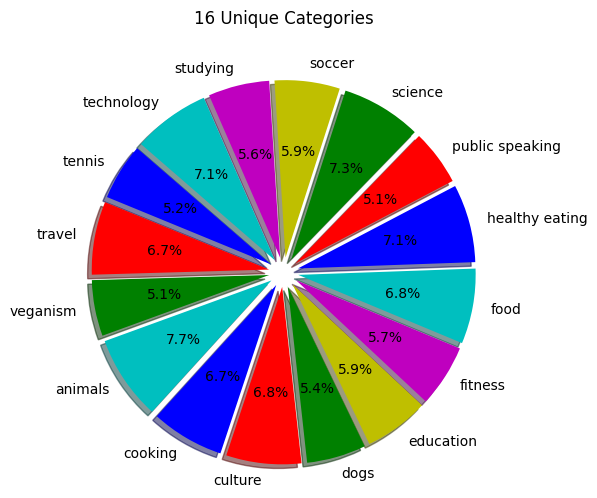

In [15]:
plt.pie(df, autopct = '%.1f%%', radius=1.2, labels= df.index, colors=colors, explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1], shadow=True, startangle=200)
plt.title("16 Unique Categories", y=1.15)
plt.show()

How many reactions are there to the most popular category?
What was the month with the most posts?

In [16]:
most = final.groupby("Category")["Reaction Type"].count().sort_values(ascending=False).head(1)

In [17]:
most

Category
animals    1897
Name: Reaction Type, dtype: int64

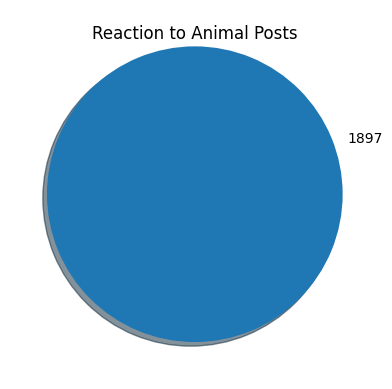

In [19]:
plt.pie(most, labels = final.groupby("Category")["Reaction Type"].count().sort_values(ascending=False).head(1), shadow=True, startangle=200)
plt.title("Reaction to Animal Posts", y=0.9)
plt.show()